In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSC LAB/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


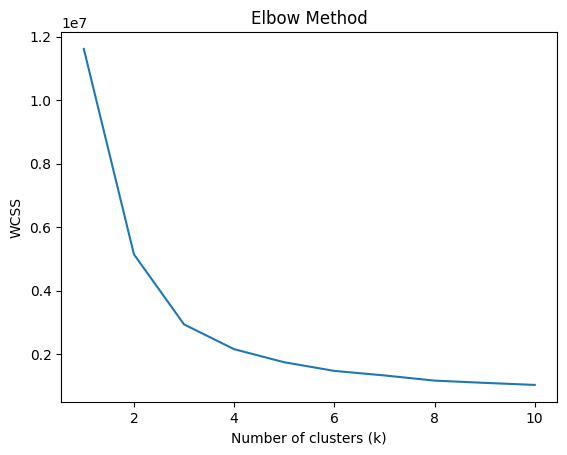

In [ ]:
# Assuming 'df' is your DataFrame
X = df.drop("Outcome", axis=1)  # Features for clustering, excluding target variable "Outcome"

wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:

# Assuming 'df' is your DataFrame

# Detect outliers using z-scores
z = np.abs(stats.zscore(df))
outliers = np.where(z > 3)

# Remove outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [ ]:
# Assuming 'df' is your DataFrame and you have performed KMeans clustering
# with k=3 as determined by the elbow method

# Separate features (X) and target variable (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster assignments
labels = kmeans.labels_

# Create a mapping between clusters and diabetes prediction
# This mapping needs to be determined based on the characteristics of each cluster
# You might need to analyze the data within each cluster to establish this mapping
cluster_mapping = {
    0: 0,  # Cluster 0 is associated with no diabetes (Outcome = 0)
    1: 1,  # Cluster 1 is associated with diabetes (Outcome = 1)
    2: 0   # Cluster 2 is associated with no diabetes (Outcome = 0)
}

# Predict diabetes based on cluster assignments and mapping
predictions = [cluster_mapping[label] for label in labels]

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y, predictions)
print(f"Accuracy: {(accuracy}")

Accuracy: 92.58720930232558


In [ ]:
p=int(input("enter pregnancies"))
g=int(input("enter glucose"))
b=int(input("enter bloodpressure"))
s=int(input("enter skinthickness"))
i=int(input("enter insulin"))
b=float(input("enter bmi"))
d=float(input("enter diabetespedigree"))
a=float(input("enter age"))
prediction=kmeans.predict([[p,g,b,s,i,b,d,a]])
print(prediction)

enter pregnancies6
enter glucose148
enter bloodpressure72
enter skinthickness35
enter insulin0
enter bmi33.6
enter diabetespedigree0.627
enter age50
[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
